In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\sneha\Downloads\titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Selecting relevant features
features = ["Pclass", "Sex", "Age", "Fare", "Embarked", "SibSp", "Parch"]
data = data[features + ["Survived"]]

In [4]:
# Handling missing values
data.loc[:, "Age"] = data["Age"].fillna(data["Age"].median())
data.loc[:, "Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

In [5]:
# Encoding categorical variables
label_encoders = {}
for col in ["Sex", "Embarked"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [6]:
# Splitting the dataset into training and test sets
X = data[features]
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier(criterion="gini",random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# Predictions
y_pred = dt_model.predict(X_test)

In [9]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.78
Confusion Matrix:
 [[84 21]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



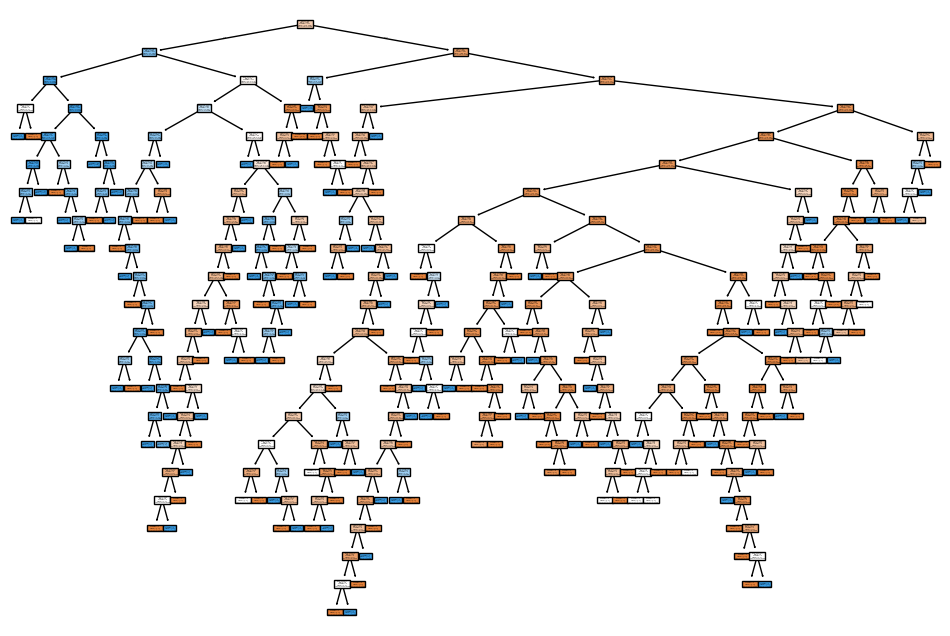

In [10]:
# Visualizing the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=features, class_names=["Not Survived", "Survived"], filled=True)
plt.show()